# Projet Data

## Sommaire

- <a href='#sectionIntro'>Introduction</a>
- <a href='#sectionVRP'>Le VRP</a>
- <a href='#sectionHeuristics'>Les heuristiques</a>
- <a href='#sectionSolution'>Solution</a>
    - <a href='#sectionInstanceGenration'>Génération d'instances</a>
    - <a href='#sectionAlgorithm'>Algorithme du recuit</a>
    - <a href='#sectionSolutionStats'>Etude de la solution</a>
- <a href='#sectionStats'>Statistiques</a>
- <a href='#sectionConclusion'>Conclusion</a>

<a id='sectionIntro'></a>
## Introduction

Ce Notebook a pour but d'expliquer notre démarche tout au long de ce projet Big Data. Dans le cadre de ce projet, nous avons été contactés par l'agence ADEME afin de proposer une solution qui permettrait d'optimiser la livraison de marchandises. Cette problématique est très importante car elle répond à un besoin de mettre en place des solutions plus économiques et moins polluantes pour le transport de marchandises et de personnes. Ces besoins font apparaitre de nouveaux défis quant à l'optimisation des ressources.

Pour répondre à cette problématique nous nous appuierons sur l'algorithme du VRP. Dans un premier temps nous discuterons donc du VRP, de sa définition mathématique, et de comment il modélise notre problème et ainsi que de ses différentes variantes. Ensuite nous étudierons les heuristiques, leur utilité et les différents types d'heuristiques à notre disposition. Ensuite nous présenterons notre solution technique, et les résultats obtenus au travers de statistiques. Pour finir nous conclurons sur les résultats de notre algorithme et la manière dont ce dernier répond à notre problématique et à l'appel d'offre de ADEME.

<a id='sectionVRP'></a>
## Le VRP


Le VRP, ou Vehicule Routing Problem est un nom générique donné à une classe de problème de recherche opérationnelle et d'optimisation combinatoire. Le problème de base est formulé de la manière suivante : déterminer les différentes tournées d'une flotte de véhicules afin de livrer une liste de clients et de retourner à leur point de départ. Le but étant généralement de minimiser le coût des livraisons, mais on peut aussi choisir d'autres critères comme le temps où l'empreinte écologique.

![VRP](img/VRP.gif)


Ce problème est une extension du problème du voyageur de commerce (TSP) : il reprend le même principe mais ajoute plusieurs véhicules au lieu d'un seul pour le TSP. Cette contrainte fait place le VRP dans la catégorie NP-Hard.

Afin de résoudre le problème du VRP il faut le définir mathématiquement : 

![Démonstration mathématique](img/maths.png)

Aujourd'hui le VRP est un problème central dans les domaines des transports et de la logistique et il le sera encore pour les années futures. En effet optimiser ses livraisons est très important pour les entreprises des domaines cités précédemment car cela leur permet de réduire leurs coûts. De ce fait il existe de nombreuses variantes du VRP avec chacune des contraintes que l'on peut trouver dans des situations réelles :
- Capacited VRP (CVRP) : tous les véhicules ont une limite sur la quantité d'objets qu'ils peuvent transporter
- VRP with Time Window (VRPTM) : chaque client doit être livré dans une certaine plage horaire
- Multiple Depot VRP (MDVRP) : les véhicules peuvent partir de plusieurs dépôts
- VRP with Pick-Up and Delivering (VRPPD) : les clients peuvent renvoyer des éléments au passage des véhicules
- Split Delivery VRP (SDVRP) : un client peut être livré par plusieurs véhicules
- Stochastic VRP (SVRP) : on ajoute des valeurs aléatoires au problème (par exemple que les clients ont une probabilité p d'être présents)
- Periodic VRP (PVRP) : au lieu de faire les livraisons sur un seul jour, on peut livrer sur N jours

Pour ce projet nous avons décidés de choisir le problème du CVRP car il nous permet de remplir deux contraintes : utiliser k camions pour faire les livraisons et la prise en compte de la capacité des camions et de l'encombrement des objets.

<a id='sectionHeuristics'></a>
## Les heuristiques

Comme dit précédemment le problème du VRP est un problème NP-Hard, ce qui signifie que les ressources nécessaires pour le résoudre augmentent exponentiellement avec la taille de ses entrées. Pour résoudre ce problème dans un temps raisonnable nous allons donc utiliser des méthodes heuristiques. Les heuristiques sont des méthodes de calculs souvent utilisées pour résoudre des problèmes NP-Hard car elles permettent de trouver une solution assez proche de la solution optimale en un temps raisonnable. Il existe différents types d'heuristiques qui peuvent être comparées avec les critères suivants :
- Qualité du résultat
- Coût de l'heuristique (temps / mémoire)

Nous avons vu différents types d'heuristiques, chacune ayant des avantages et des inconvénients.

### Les algorithmes gloutons
Les algorithmes gloutons suivent le principe suivant : à chaque étape ils choisissent un optimum local. Ils ont en général un coût assez faible mais en général ils n'aboutissent pas à un optimal global, comme illustré dans l'exemple ci-dessous.

![Algorithme Glouton](img/greedy.png)
Ici on part du point A et on cherche à monter selon la plus forte pente. Avec ce type d'algorithme on atteint le point m qui est un maximum local mais pas global.


### La recherche Tabou
Le principe du Tabou est d'effectuer une recherche sur ses voisins, puis de prendre la valeur qui optimise la fonction objectif, tout en évitant les valeurs par lesquelles l'on est déjà passé. Cet algorithme permet de sortir d'un optimum local pour potentiellement trouver un minimum global. A chaque fois que l'on visite un nouveau point, on l'ajoute dans une file FIFO ce qui va permettre à l'algorithme de se souvenir des points qu'il a déjà traversé tout (dans la limite des n derniers points avec n la taille de la file).
C'est algorithme converge un peu plus lentement qu'un algorithme glouton mais il permet d'obtenir de meilleurs résultats.

### Le recuit simulé
Le recuit simulé se base sur la recherche tabou mais introduit une notion de température, plus la température est élevée, plus l'algorithme a de chance de prendre une solution de moins bonne qualité. L'algorithme se découpe en 3 phases :
- On choisit un point s au hasard sur la courbe à minimiser (pour avoir une valeur de départ) et on choisit un température T assez élevée.
- On fait une recherche sur les voisins de s. Si la nouvelle solution est meilleure alors on la garde, sinon on calcule la probabilité d'accepter une solution moins bonne à l'aide de la température T. Dans les deux on décrémente la température T.
- Quand la température a atteint un certain seuil décidé par l'utilisateur, le programme s'arrête.

L'exemple suivant montre la recherche d'un maximum sur une courbe avec la méthode du recuit simulé, avec en bleu l'optimum global à un instant t, en rouge la valeur de s, et en noir la valeur des voisins de s
![Recuit Simulé](img/recuit.gif)



### Les algorithmes génétiques
La dernière catégorie d'heuristiques que nous allons étudier sont les algorithmes génétiques. Ces derniers se basent sur le principe de la sélection naturelle afin de proposer une solution à un problème. Il existe une multitude de variantes d'algorithmes génétiques mais ils ont tous une base commune :
![Algorithme Génétique](img/genetic.jpg)

La première étape d'un algorithme génétique consiste à générer une population initiale d'individus (en se servant de valeurs aléatoires ou de valeurs par défaut). Ensuite les individus sont évalués par une fonction que l'on peut assimiler à une fonction objectif. Cette fonction va déterminer à quel point un individu est susceptible de se faire sélectionner pour servir de base à la prochaine population. Vient ensuite une étape de sélection qui va retenir des individus afin de les faire passer à la génération suivante (plus un individu a eu un bon score à sa fonction d'évaluation, plus il est susceptible d'être sélectionné). Ces deux étapes sont une reproduction du principe de sélection naturelle. Vient ensuite une étape de reproduction, dont le but va être de mélanger les caractéristiques des individus sélectionnés (échange de caractéristique, ajout / retrait de caractéristiques en fonction de valeurs aléatoires, ...) afin d'obtenir une nouvelle population. Cette étape peut être assimilé aux différentes mutations rencontrées dans le monde biologique.
Le programme s'arrête en fonction d'une condition qui peut être soit un nombre fixe d'itérations soit basée sur les caractéristiques de la population.

## Choix de l'algorithme
Pour ce projet notre choix s'est porté sur l'algorithme du recuit simulé. En effet il nous permet d'obtenir des solutions assez proches de la solution optimale dans un temps de calcul qui reste raisonnable pour notre projet. Les algorithmes gloutons et tabou donnant des solutions avec un écart très important par rapport à la solution optimale.

PARLER DE L4ALGO GENETIQUE

<a id='sectionSolution'></a>
## Solution

Comme dit précédemment notre solution s'appuie sur un algorithme de recuit simulé. Dans cette partie nous allons détaillées les différentes étapes de notre solution ainsi que tous les modules qui l'accompagne.

<a id='sectionInstanceGenration'></a>
### Modélisation du problème algorithmique : génération d'instances
Afin de tester notre algorithme il nous a fallu un moyen de générer différents cas de tests pour notre programme. Nous avons donc créé un algorithme qui permet de générer des instances du problème du CVRP. La structure de donnée que nous avons utilisée est la suivante :

In [16]:
instance = {
    'trucksCount' : int,
    'trucksCapacity' : int,
    'nodes' : [int],
    'matrix' : [[int]]
}

La variable 'trucksCount' est un entier qui représente le nombre de comaions disponibles. La variables 'trucksCapacity' est un entier qui représente la capacité totale d'un camion. La variable 'nodes' est une liste d'entiers qui contient la demande sur chaque node. L'unité utilisé pour représenter ce poids est la même que celle utilisée pour représenter la capacité des camions. Enfin la variable 'matrix' est un tableau à deux dimensions qui contient des entiers. Ces tableaux représentent une matrice de poids. Pour accéder à la distance entre un nœud i et un nœud j on accède à la case matrix[i][j].


Ci-dessous on peut voir un graphe pondéré suivit de sa représentation avec une matrice des poids.

![Exemple de graphe](img/graph.png)

In [17]:
matrice = [
[ 0,50,20,30],
[50, 0,25,28],
[20,25, 0,45],
[30,28,45, 0]
]

## Installation
Ce Notebook Jupyter requiert des modules externes pour fonctionner, pour les installer tapez la commande ci-dessous dans l'invite de commande de Anaconda.

Le script une case en dessous permet d'importer ces différents modules, ce qui va nous permettre d'insérer des démonstrations dans les cellules suivantes.

In [19]:
conda install -c anaconda matplotlib numpy parse scipy

SyntaxError: invalid syntax (<ipython-input-19-405e7984f471>, line 1)

In [20]:
import sys
import csv

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pylab

### Algorithme de génération de données aléatoires

L'algorithme ci-dessous permet de générer des instances du problème CVRP avec des valeurs aléatoires. On peut modifier les bornes inférieures et supérieures des valeurs générées à l'aide de constantes au de variables. L'algorithme utilise un système de log afin de garder une trace de tous les jeux de données qui ont été généré. L'aléatoire est généré à partir d'une seed qui peut être spécifiée par l'utilisateur ou générée aléatoirement si l'utilisateur ne spécifie aucune valeur. C'est cette seed qui est stockée dans le fichier de log. Pendant la génération on fait aussi attention à ne pas générer des cas impossibles (par exemple en mettant un poids trop grand pour le nombre de camions et leur capacité).

### Algorithme de génération à partir d'un fichier
Afin de faire des statistiques sur la qualité de notre solution, nous devons utiliser notre algorithme sur des cas de test dont la solution optimale est connue, puis comparer cette solution avec celle de notre algorithme. Le programme suivant permet de créer une instance du problème à partir d'un fichier dont le nom est passé en paramètre.<br/><br/>
Ces fichiers ont le format suivant :<br/>
NAME : string - le nom du cas de test<br/>
COMMENT : (some text, No of trucks: int - nombre de camions, Optimal value: int - optimum global)<br/>
TYPE : CVRP - Non utilisé (tous nos cas de tests sont en CVRP)<br/>
DIMENSION : int - nombre de nœuds du graphe<br/>
EDGE_WEIGHT_TYPE : EUC_2D (non utilisé) <br/>
CAPACITY : int (capacité de chaque camion)<br/>
NODE_COORD_SECTION <br/>
 id x y (répété n fois en fonction du nombre de nœuds du graphe)<br/>
DEMAND_SECTION <br/>
id demand (répété n fois en fonction du nombre de nœuds du graphe<br/>
DEPOT_SECTION <br/>
 id (id du nœud qui représente le dépôt)

### Étude de complexité

CVRP est un mélange de deux problème célèbres : le problème du sac à dos (backpack problem) et le problème du voyageur de commerce (Traveling Salesman Problem, ou TSP).
- Il doit assigner des ensembles de villes ayant des poids à des ensembles de camions de sorte à minimiser la distance parcourue pour aller du dépôt vers toutes les villes et rentrer sans dépasser la capacité maximale des camions. Ce qui est presque analogue au problème du sac à dos qui doit assigner un ensemble d'objets à un sac à dos pour maximiser le poids qu'il contient, sans dépasser sa capacité maximale.
- Il doit également minimiser la distance parcourue par chaque camion tout en les faisant passer par toutes les villes qui leur sont assignés. Ce qui revient au TSP qui consiste à minimiser la distance parcourue pour passer par en ensemble de points donnés.


TSP et le problème du sac à dos sont tous les deux des problèmes NP-complets puisqu'ils peuvent tous les deux être réduit polynomialement au problème 3-SAT qui a été prouvé être NP-Complet de façon rigoureuse en 1972. On sait donc par réduction polynomiale que le problème du CVRP est au moins NP-complet et donc NP-Difficile puisque cela veut dire qu'il est au moins aussi difficile à résoudre que TSP et le problème du sac à dos qui eux sont NP-complet.

<a id='sectionAlgorithm'></a>
## Présentation de l'algorithme de résolution 

### Fonctionnement

Comme dit précédemment nous avons optés pour un algorithme de recuit simulé donc la fonction à minimiser est la distance parcourue par tous les camions. Les différentes valeurs de cette fonction sont obtenues en modifiant le cycle des camions à chaque itération du programme. 

Puisque le VRP est à la fois un problème d'assignement des villes et un TSP sur la liste des villes de chaque camions, il y a 2 type d'opération qu'on peut effectuer à chaque itération pour modifier les cycles des camion :

- on peut échanger la place de deux villes dans le cycle d'un camion
![swapInter](img/swapInter2.jpg)


- on peut échanger une ville entre deux camions
![swapExtra](img/swapExtra2.jpg)



In [12]:
précédemment def switch_action(action_id):
    """Determines if we swap cities inside the same truck or between two trucks"""
    switcher = {
        1: swap_between_trucks_CVRP,
        2: swap_inside_a_truck

    }
    return switcher.get(action_id, print_error)

Ces deux actions ont chacune 50% de chance d'arriver à chaque itération.


La fonction d'échange de deux villes pour un même camion génère deux nombres aléatoires, vérifie qu'il ne s'agit pas de la même ville et les échange. 

Ci-dessous une démonstration de la fonction :

### Démonstration d'une fonction d'action

In [13]:
import random
def swap_inside_a_truck(trucks_list, maximum_trucks_capacity, all_items, max_capacity):
    """Swap two items inside the same truck"""
    # select a truck at random in the list
    truck_index = random.randrange(len(trucks_list))
    truck = trucks_list[truck_index]

    # if the truck has less than two items, we can't swap them, so we pick another one
    while len(truck) < 2:
        truck_index = random.randrange(len(trucks_list))
        truck = trucks_list[truck_index]

    print("Trucks before the swap "+ str(trucks_list))
    
    # generate two randoms to decide which items to swap
    rand_item1 = random.randrange(len(truck))
    rand_item2 = random.randrange(len(truck))

    # if we picked the same item, we re-roll one of them
    while rand_item1 == rand_item2:
        rand_item2 = random.randrange(len(truck))
    
    print("Swap within truck "+ str(truck))
    # swap the two items
    truck[rand_item1], truck[rand_item2] = truck[rand_item2], truck[rand_item1]

    # update the truck list with the new truck
    trucks_list[truck_index] = truck
    return trucks_list

trucks_routes = [[1,2,3,4],[5,6,7,8,9]]
maximum_trucks_capacity = 100
all_items = {0:0,1:24,2:18,3:30,4:45,5:20,6:12,7:15,8:20,9:13}

trucks_routes = swap_inside_a_truck(trucks_routes, maximum_trucks_capacity, all_items, maximum_trucks_capacity)
print("Trucks after the swap "+ str(trucks_routes))


Trucks before the swap [[1, 2, 3, 4], [5, 6, 7, 8, 9]]
Swap within truck [5, 6, 7, 8, 9]
Trucks after the swap [[1, 2, 3, 4], [8, 6, 7, 5, 9]]


###  Sécificité de l'algorithme : la fonction d'échange de villes du CVRP

La fonction d'échange de ville entre 2 camions est beaucoup trop complexe pour être présentée dans ce notebook. Elle suit les X étapes suivantes:
- détermine toutes les villes pouvant être ajoutées à un camion sans dépasser sa capacité maximale
- choisi aléatoirement un camion parmi ceux pouvant accommoder une ville de plus
- choisi une aléatoirement une ville parmi celle que le camion peut accommoder
- retire la ville de la liste du camion s'en chargeant actuellement et l'ajoute à celle du camion sélectionné


En alternant ces deux actions on parvient donc à répartir les villes de sorte à ce que la somme des trajets des camions soit minimisée et à diminuer la distance parcourue par chaque camion individuellement (et donc également la somme) en échangeant l'ordre dans lequel il dessert les villes.


### Paramètres de l'algorithme

   L'algorithme de recuit que nous avons développé se veut générique. Il peut être appliqué à d'autres problème de le CVRP. Il a d'ailleurs initialement été développé pour résoudre le VRP. 

   Il reçoit donc tous les paramètres dont il a besoin pour modéliser le problème et la fonction chargée de calculer la valeur que l'on souhaite optimiser, ici la distance, peut simplement être modifiée sans changer le comportement du recuit. 
    
   Il en est de même pour les fonctions permettant de faire varier la valeur à optimiser. Il peut y avoir autant d'actions que nécessaire pour modifier les éléments influençant la fonction à optimiser puisqu’elles sont récupérées depuis une fonction externe. Dans notre cas, seul deux actions sont possibles pour faire varier la distance. Pour ce qui est des arguments que les différentes actions pourraient avoir besoin, il suffit de les donner en paramètre du recuit puis de les passer à la fonction les utilisant, comme c'est le cas pour notre fonction échangeant une ville entre deux camions qui nécessite plusieurs paramètres qui ne sont utilisés nulle part ailleurs.

In [ ]:

def annealing_CVRP(matrix, all_items, depot, number_of_trucks, trucks_maximum_capacity, temperature, temperature_coefficient, iteration_count):
    trucks = []
    current_optimum = 1000000000
    starting_solution = split_clients(all_items, number_of_trucks, trucks_maximum_capacity)
    current_solution = np.array(starting_solution)
    # convert to array just in case
    current_solution = current_solution.tolist()
    # check if there are enough trucks
    number_of_iterations = 0
    results = []
    all_results = []
    # difference of almost 0 to begin with but not exactly 0
    delta_e_avg = 0.00000000001
    for iteration_number in range(iteration_count):
        random_action = random.randrange(1, 2)
        action = switch_action(random_action)
        current_solution = action(current_solution, depot, all_items, trucks_maximum_capacity)
        # if there are more trucks than we truly need, we add more up to the needed amount
        if len(current_solution) < number_of_trucks:
            for truck in range(0, number_of_trucks - len(current_solution)):
                current_solution.append([])

        total_cost = calculate_distance(current_solution, matrix, 0)

        delta_e = abs(total_cost - current_optimum)
        # objective function is worse
        if (total_cost > current_optimum):
            if (iteration_count == 0): delta_e_avg = delta_e
            # generate probability of acceptance
            p = math.exp(-delta_e / (delta_e_avg * temperature))
            # determine whether to accept worse solution
            if random.random() < p:
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, we accept it
            accept = True
        if accept:
            # update currently accepted solution
            current_optimum = total_cost
            # add the accepted solution and its value in a list to plot them and the end
            optimal_solution = current_solution.copy()
            optimal_solution_copy = []  # xopti.copy()
            # print("accepted "+ str(xc))

            for truck in optimal_solution:
                truck_copy = np.array(truck.copy()).tolist()
                # add the depot node at the beginning and the ed of the route
                truck_copy.insert(depot, depot)
                truck_copy.insert(len(truck_copy), depot)
                optimal_solution_copy.append(truck_copy)

            trucks.append(optimal_solution_copy)
            # add accepted results to plot them
            results.append(current_optimum)
            # increment number of accepted solutions
            number_of_iterations += 1
            # update delta_e_avg
            delta_e_avg = (delta_e_avg * (number_of_iterations - 1) + delta_e) / number_of_iterations
        all_results.append(total_cost)
        temperature = temperature_coefficient * temperature
    print(current_optimum)
    print(optimal_solution)
    mean_cost = sum(all_results) / len(all_results)
    return current_optimum, mean_cost, trucks, results, all_results


### modélisation (dire liste et matrice, pb de max)

In [14]:
def run():
    
    file = open(RESULTS_FILE, "w", newline='')
    try:
        writer = csv.writer(file)
        writer.writerow(('Time', 'Result', 'ExpectedResult', 'CitiesCount', 'TrucksCount', 'Iterations', 'Temperature', 'Coef'))
        
        #put this block in a for loop
        start_time = time.time()
        instance = generateFromSeed()
        #fonction de nico
        
        #logging results
        result = 800
        expectedResult = 500
        iterations = 0
        temperature = 0
        coef = 0
        writer.writerow((time.time() - start_time, result, expectedResult, len(instance['nodes']), instance['trucksCount'], iterations, temperature, coef))
    finally:
        file.close()
    
run()

NameError: name 'RESULTS_FILE' is not defined

## Tests


Le graphique ci-dessous montre toutes les distances obtenues en échangeant aléatoirement des villes entre les camions ou au sein d'un même camion sur un million d'itérations. On peut voir que les résultats obtenus sont chaotiques allant d'environ 2600 à 1400 pour une moyenne à 2100.
![All proposed solutions](img/allSolutions.jpg)


Le graphique ci-dessous en revanche ne monte que les solutions retenues par le recuit. On peut y observer le comportement typique d'un algorithme de recuit simulé où il accepte au départ de très nombreuses valeurs, mêmes si celles-ci sont moins bonnes, puis devient de plus en plus glouton, n'acceptant plus à la fin que les solutions minimisant la distance actuelle.
![Accepted solutions](img/acceptedSolutions.jpg)


Ce graphique est le graphique principalement utilisé pour vérifier le fonctionnement d'un recuit car il permet rapidement de visualiser si l'algorithme est passé par les phases du recuit et à bien accepté une valeur optimale après le nombre donné d'iterations.

On peut par exemple constater qu'ici la température ne diminue pas assez vite pour le nombre d'itération données, le recuit n'as donc pas le temps de devenir glouton pour trouver un optim.
![failled annealing](img/failledAnnealing1.jpg)

A l'inverse on peut voir sur ce graphique que la température diminue trop rapidement et l'algorithme devient glouton trop rapidement, ce qui veut dire que l'optimum trouvé et probablement éloigné de l'optimum local
![failled annealing](img/failledAnnealing2.jpg)


**Visualisation dans l'espace**

Le code servant à générer un graphe affichant toutes les nodes n'a initialement pas été prévu pour répartir les villes selon leurs coordonnées. Puisque cette visualisation n'était pas un attendu elle avait été réalisé rapidement pour permettre la visualisation d'animations sur de petits jeux de données utilisés pour les tests. Voici néanmoins ce à quoi ressemble le graphe d'un problème de 32 villes résolu. Il est important de noter que les positions des villes ne dépend pas de leur distance avec le dépôt. Ce graphe ne permet donc pas de visualiser si la solution obtenue est optimale mais permet de vérifier la présence de cycle et que chaque ville n'est visitée que par un seul camion
![Graph for 36 cities](img/36CitiesGraph.jpg)

<a id='sectionSolutionStats'></a>
### Performance de l'algorithme
Etude du niveau de complexité + stats

Prog stats + automatisation récolte des stats

Analyse de la solution niveau complexité

<a id='sectionStats'></a>
## Statistiques

Pour chaque instance de CVRP que notre algorithme résout, il stocke le résultat dans un fichier CSV. Chaque entrée contient des informations qui permettent de faire des statistiques sur notre algorithme. On y retrouve le temps d'exécution, le résultat trouvé par notre algorithme et le résultat optimal (si le jeu de données est connu), et les paramètres du recuit (nombre d'itérations, température de départ, ...).

Nous avons décidé d'effectuer deux séries de tests statistiques. La première série utilise des dataset générés aléatoirement par notre algorithme de génération, en contrôlant uniquement un paramètre (par exemple le nombre de villes ou le nombre de camions). Cette série statistique a pour but de mesurer les performances de notre programme face à une montée en charge assez importante (plusieurs milliers de villes). Ces statistiques ont pour but de montrer comment les changements sur les paramètres du dataset influent sur le temps d'exécution.

La deuxième série utilise des dataset connus. Cela va nous permettre de comparer la solution trouvée par notre algorithme à la solution optimale connue. Les paramètres qui seront changés seront ceux de notre algorithme de résolution, comme par exemple la température de base, le coefficient de recul de la température ou encore le nombre d'itérations. Cette deuxième série de statistiques aura donc pour but de montrer comment les différents paramètres du notre algorithme affecte la qualité de nos solutions.

Toutes les séries statistiques et les graphiques ci-dessous ont été réalisé en ne faisait varier qu'un seul paramètre à la fois, ce qui nous a permis de conclure sur la corrélation ou sur la non-corrélation entre la qualité de la solution / la vitesse de calcul et le paramètre en question.

Nb of cities / Time (s) : Y(x) = 0.30118085969480357x + -80.35110548965912
Nb of trucks / Time (s) : Y(x) = 0.2727722722551097x + 1.705345444921135
Temperature / Quality Coef : Y(x) = -0.0006997264815788038x + 0.509557305436477
Coef / Quality Coef : Y(x) = 0.38033823737106226x + 0.1451847789989137
Iterations / Quality Coef : Y(x) = 1.3136492824998165e-07x + 0.44701966559504547


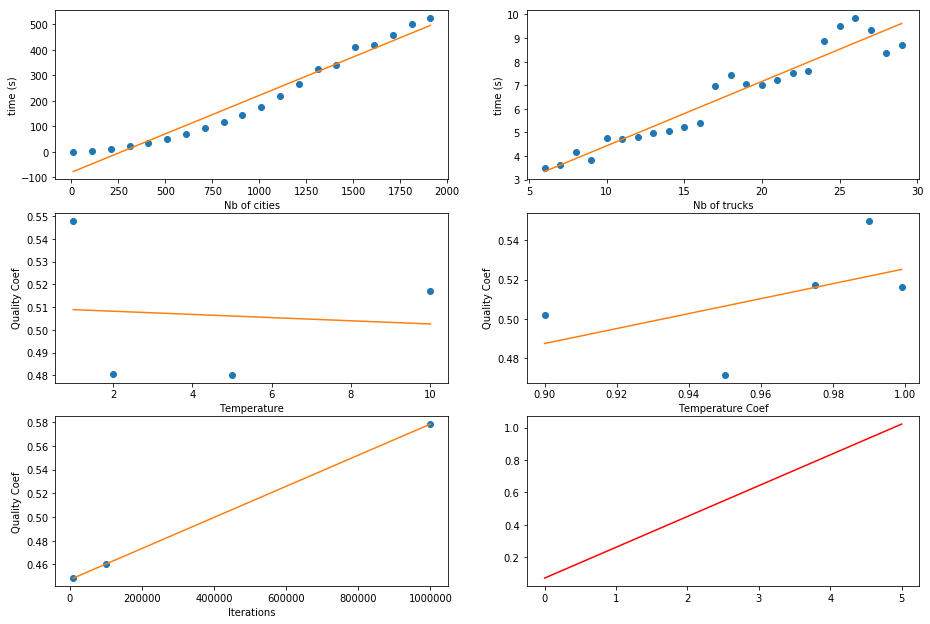

In [7]:
def calculateLinearRegression(xvalues, yvalues, xaxistitle, yaxistitle, windowTitle):
    xvalues = np.array(xvalues)

    slope, intercept, r_value, p_value, std_err = stats.linregress(xvalues, yvalues)
    line = slope * xvalues + intercept

    print('{0} : Y(x) = {1}x + {2}'.format(windowTitle, slope, intercept))

    plt.plot(xvalues, yvalues, 'o', xvalues, line)
    plt.xlabel(xaxistitle)
    plt.ylabel(yaxistitle)

    return slope, intercept


def retrieveStatsFromFile(fileName):
    data = [[]]

    file = open(fileName, "rt")
    try:
        reader = csv.reader(file)
        next(reader)
        data = list(reader)
    finally:
        file.close()
    return data


def main():
    RESULTS_DIRECTORY = 'Stats/Results/'
    
    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'cities.csv')
    plt.subplot(321)
    calculateLinearRegression([int(x[4]) for x in data], [float(x[0]) for x in data], 'Nb of cities', 'time (s)', 'Nb of cities / Time (s)')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'trucks.csv')
    plt.subplot(322)
    calculateLinearRegression([int(x[5]) for x in data], [float(x[0]) for x in data], 'Nb of trucks', 'time (s)', 'Nb of trucks / Time (s)')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'temperature.csv')
    plt.subplot(323)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    coefSlope, coefIntercept = calculateLinearRegression([int(x[7]) for x in data], qualityCoef, 'Temperature', 'Quality Coef', 'Temperature / Quality Coef')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'coef.csv')
    plt.subplot(324)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    temperatureSlope, temperatureIntercept = calculateLinearRegression([float(x[8]) for x in data], qualityCoef, 'Temperature Coef', 'Quality Coef', 'Coef / Quality Coef')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'iterations.csv')
    plt.subplot(325)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    calculateLinearRegression([int(x[6]) for x in data], qualityCoef, 'Iterations', 'Quality Coef', 'Iterations / Quality Coef')

    plt.subplot(326)
    x = np.linspace(0, 5, 100)
    y = (temperatureSlope + coefSlope) / 2 * x + (temperatureIntercept + coefSlope) / 2
    plt.plot(x, y, '-r')

    plt.subplots_adjust(bottom=8, top=10, left=3, right=5)
    plt.show()

main()


### Etude des courbes

La première courbe en haut à gauche représente le temps d'exécution de l'algorithme (en s) par rapport au nombre de villes de notre instance. On remarque une corrélation très forte entre les deux valeurs, ce qui est normal vu que le nombre de villes influe directement sur le nombre d'itérations que va faire notre algorithme.

La deuxième courbe représente le temps d'exécution par rapport au nombre de camions. Comme pour le premier graphe, on remarque que les valeurs sont fortement corrélées. On remarque aussi des "paliers", qui peuvent s'expliquer par la répartition des éléments dans les camions. Comme l'algorithme essaye de charger chaque camion avec le même poids, quand le nombre de camions est un multiple du poids total cela oblige l'algorithme à utiliser plus de camions et donc cela prend plus de temps pour calculer leurs itinéraires respectifs.


La troisième et la quatrième courbe représentent l'influence de la température et du coefficient de recul de la température sur la qualité de la solution. Cette qualité est calculée de la manière suivante :
- faire la différence entre la valeur moyenne trouvée par l'algorithme et la valeur optimale connue
- faire la différence entre la valeur moyenne trouvée par l'algorithme et la valeur minimale trouvée par l'algorithme
- faire un ratio entre les deux valeurs calculées précédemment

Dans l'algorithme du recuit simulé, la température et le coefficient de température sont deux valeurs qui sont liées, nous les avons donc regroupées dans le graphe numéro 6 (en bas à droite). Expliquer la température et le coef


Le graphique numéro 5 représente la qualité de la solution par rapport au nombre d'itérations. Ici le nombre d'itérations correspond à la qualité de la solution, ce qui est normal car avec un nombre d'itérations plus élevé, notre programme aura plus de temps pour trouver un meilleur optimum.

<a id='sectionConclusion'></a>
## Conclusion